In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from statsmodels.formula.api import ols

# 다중회귀분석
* 단일 회귀분석에 비해 변수가 2개이상 증가
* 기술통계학이나 추론통계학 상의 주요 기법

* 종속변수 $y$를 보다 더 잘 설명하고 예측하기 위해 여러 독립변수 $x$를 사용함

* 다중회귀방정식 : 
   $ \hat y = a + bx_1 + cx_2 + dx_3 + .... $

* 하지만, 독립변수가 3개 이상인 경우 그래프로 표현하기 어려워지므로
  + 보통 $ \hat y = a + bx_1 + cx_2 $ 정도로만 고려하는 것이 좋음

### 부동산회사 난방비 예측 모델 생성

In [3]:
houses = pd.read_csv('https://raw.githubusercontent.com/siestageek/datasets/master/txt/houses.txt', encoding='euc-kr',sep='\t')
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   난방비     20 non-null     int64
 1   평균외부기온  20 non-null     int64
 2   단열재     20 non-null     int64
 3   난방사용연수  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [13]:
hmax = np.max(houses.평균외부기온)
hmin = np.min(houses.평균외부기온)

In [5]:
plt.rcParams['font.family'] = 'NanumGothic'  ## 윈도우에 자체 폰트

C:\Users\LG PC\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\LG PC\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


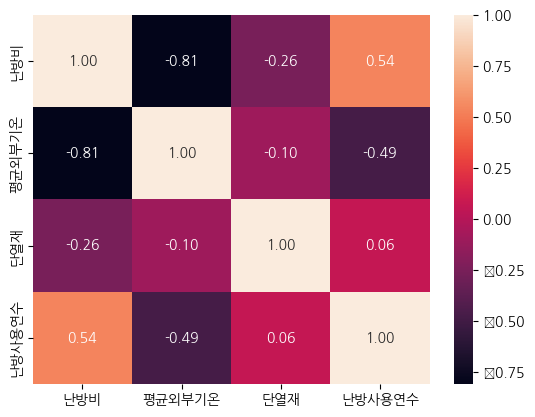

In [6]:
sns.heatmap(houses.corr(),annot=True, fmt='.2f')
plt.show()

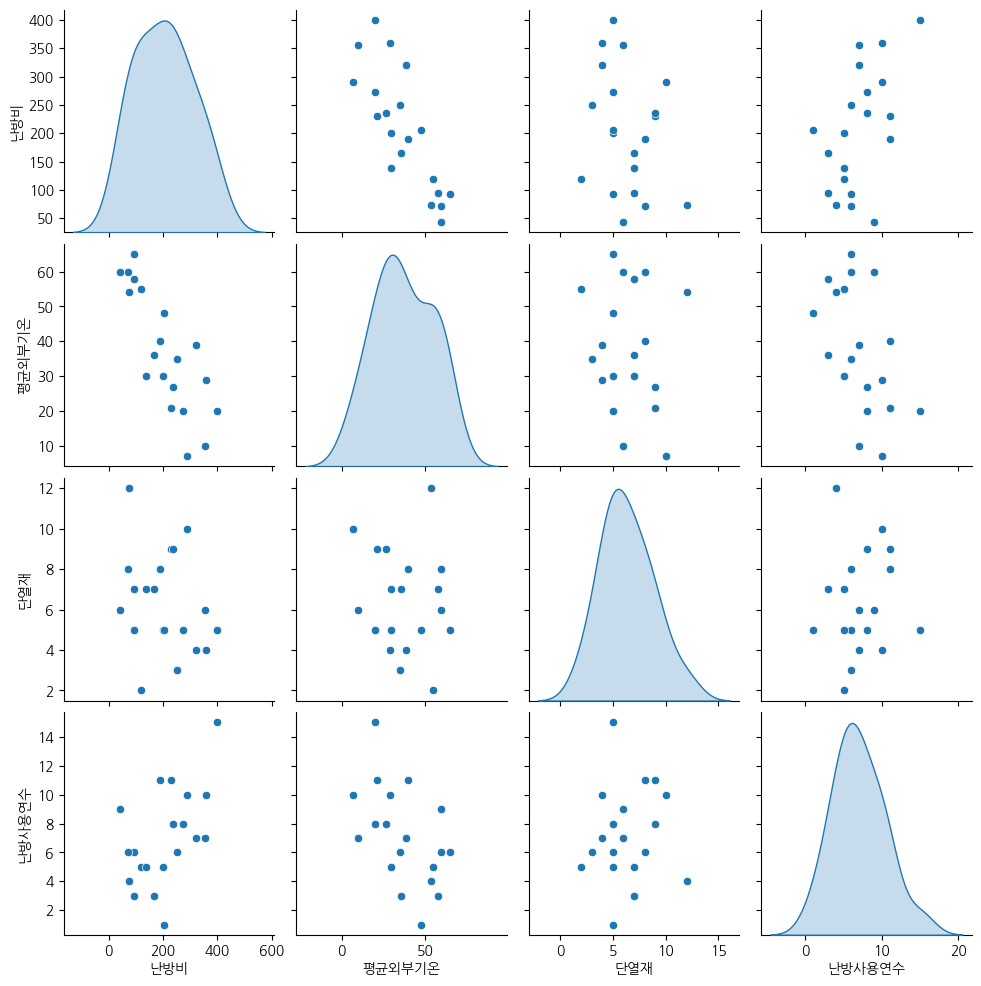

In [18]:
sns.pairplot(houses,diag_kind='kde')
plt.show()

## 부동산회사 난방비 다중회귀 분석

In [21]:
# 분석 대상컬럼은 '종속변수 ~ 독립변수1,독립변수2...' 형태의 식으로 작성해야 함
# 간단하게 '종속변수~.'로도 사용함
result = pd.DataFrame(houses)

# 분석 대상컬럼은 '종속변수 ~ 독립변수' 형태의 식으로 작성해야 함
model = ols('난방비~평균외부기온+단열재+난방사용연수',data=result).fit()
# model = ols('난방비~.',data=result).fit()

# 분석결과 확인은 summary
print(model.summary())

##

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     21.90
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           6.56e-06
Time:                        16:12:33   Log-Likelihood:                -104.80
No. Observations:                  20   AIC:                             217.6
Df Residuals:                      16   BIC:                             221.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    427.1938     59.601      7.168      0.0

In [ ]:
# 회귀식 : y = -4.58평균외부기온 -14.83단열재 +6.1 난방사용연수 + 427.19

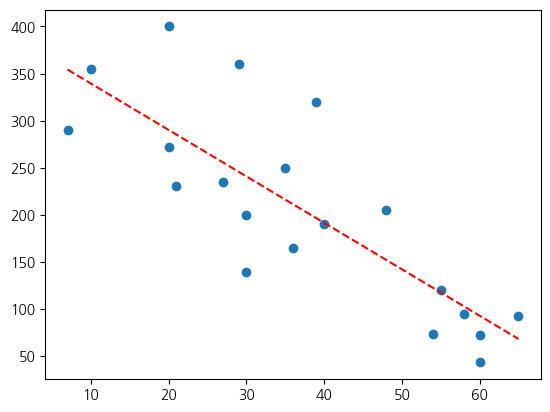

In [22]:
plt.scatter(houses.평균외부기온,houses.난방비)

x = np.arange(hmin,hmax+1,1)                                  
y = -4.9342*x + 388.8020

plt.plot(x,y,'r--')

# 다중회귀모형 분석방법
* **수정된 결정계수**
  + 독립변수의 수가 증가할수록 예측력이 좋아져서
  + 결정계수의 수치가 증가하는 경향이 있음
  + 이러한 효과를 상쇄시킨 수정된 결정계수를 사용
* 모든 회귀계수들의 유의성을 판단 : $F$분포
  + 다중회귀계수가 모두 0인지 검정함
  + 귀무가설 : 각 계수 $a$,$b$,$c$ 가 0이다
  + 대립가설 : 각 계수 $a$,$b$,$c$ 가 0이 아니다
  + 유의수준 0.05로 정함, 양측검정
* 개별회귀계수에 대한 평가 : $t$분포
  + 귀무가설 : 계수 $x$ 가 0이다
  + 대립가설 : 계수 $x$ 가 0이 아니다
  + 유의수준 0.05로 정함, 양측검정

In [23]:
model = ols('난방비~평균외부기온+단열재',data=result).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     29.42
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.01e-06
Time:                        16:33:53   Log-Likelihood:                -106.15
No. Observations:                  20   AIC:                             218.3
Df Residuals:                      17   BIC:                             221.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    490.2859     44.410     11.040      0.0

In [ ]:
# 회귀식 : y = -5.14 평균외부기온 -14.71 단열재 + 490.28

### 다중회귀모델 해석
+ $y = -5.14 평균외부기온 -14.71 단열재 + 490.28$
+  평균외부기온 1도 증가 => 난방비는 5.14 감소
+  단열재 두께가 1cm 증가 => 난방비는 -14.71 감소
+  주택 자체 기본 난방비 => 난방비는 490.28

# 독립변수 최적화
* 독립변수가 많을때 유의한 계수를 포함시키고 유의하지 않은 계수를 제외시켜 구한 회귀방정식은 간단해지고 이해하기 쉬워짐
* 가능하다면 적은수의 독립변수를 포함하는 것이 좋음
* 다중회귀식에 포함할 수 있는 독립변수들을 효과적으로 선별할 수 있는 분석방법
  + 단계적 회귀법, 단계적 변수선택법

# 독립변수 소거법
* 전진소거법 : 변수를 하나씩 추가함 => 중요도가 높은 변수부터 추가
* 후진소거법 : 모든 변수를 추가해둔 상태에서 $p$값이 높은 변수부터 제거
* 단계적 선택법 : 전진/후진 소거법을 적절히 조합

* 변수소거시 참고해야하는 지표 : AIC, BIC
  + 모델에 $k$개의 변수를 추가하면 $2k$만큼 불이익이 추가함
  + 따라서, 변수 소거시 AIC, BIC가 낮아지는 모델을 찾으면 됨

### 변수소거(후진소거)를 이용한 부동산회사 난방비 다중회귀 분석

In [25]:
# 후진소거 1
model = ols('난방비~평균외부기온+단열재+난방사용연수',data=result).fit()
print(model.summary())

# 수정된 결정계수: 0.767
# AIC : 217.6
# => 난방사용연수 계수가 유의하지 않음 (0.148) - 제거

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     21.90
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           6.56e-06
Time:                        16:52:23   Log-Likelihood:                -104.80
No. Observations:                  20   AIC:                             217.6
Df Residuals:                      16   BIC:                             221.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    427.1938     59.601      7.168      0.0

In [26]:
# 후진소거 2
model = ols('난방비~평균외부기온+단열재',data=result).fit()
print(model.summary())

# 수정된 결정계수: 0.749
# AIC : 217.6 => 218.3

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     29.42
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.01e-06
Time:                        16:53:57   Log-Likelihood:                -106.15
No. Observations:                  20   AIC:                             218.3
Df Residuals:                      17   BIC:                             221.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    490.2859     44.410     11.040      0.0

### 변수소거(전진소거)를 이용한 부동산회사 난방비 다중회귀 분석

In [56]:
# 전진소거 1
model = ols('난방비 ~ 평균외부기온', data=houses).fit()
print(model.summary())

# 수정된 결정계수: 0.640
# AIC : 224.7

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     34.72
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.41e-05
Time:                        17:15:27   Log-Likelihood:                -110.36
No. Observations:                  20   AIC:                             224.7
Df Residuals:                      18   BIC:                             226.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    388.8020     34.241     11.355      0.0

In [57]:
# 전진소거 2
model = ols('난방비 ~ 단열재', data=houses).fit()
print(model.summary())

# 수정된 결정계수: 0.014
# AIC : 244.8
# Prob (F-statistic) : 0.274
# 계수 유의확률 : 0.274

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.274
Date:                Fri, 11 Nov 2022   Prob (F-statistic):              0.274
Time:                        17:15:31   Log-Likelihood:                -120.42
No. Observations:                  20   AIC:                             244.8
Df Residuals:                      18   BIC:                             246.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    275.0292     66.137      4.158      0.0

In [58]:
# 전진소거 3
model = ols('난방비 ~ 난방사용연수', data=houses).fit()
print(model.summary())

# 수정된 결정계수: 0.249
# AIC : 239.4
# 단, 평균외부기온 유의확률이 크므로 의미 없음

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     7.284
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0147
Time:                        17:15:42   Log-Likelihood:                -117.71
No. Observations:                  20   AIC:                             239.4
Df Residuals:                      18   BIC:                             241.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.1840     48.656      1.771      0.0

In [59]:
# 전진소거 4
model = ols('난방비 ~ 평균외부기온 + 단열재', data=houses).fit()
print(model.summary())

# 수정된 결정계수: 0.640 -> 0.749
# AIC : 224.7 -> 218.3

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     29.42
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.01e-06
Time:                        17:15:58   Log-Likelihood:                -106.15
No. Observations:                  20   AIC:                             218.3
Df Residuals:                      17   BIC:                             221.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    490.2859     44.410     11.040      0.0

In [60]:
# 전진소거 5
model = ols('난방비 ~ 평균외부기온 + 난방사용연수', data=houses).fit()
print(model.summary())

# 수정된 결정계수: 0.640 -> 0.648
# AIC : 224.7 -> 225.1

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     18.49
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           5.43e-05
Time:                        17:16:06   Log-Likelihood:                -109.55
No. Observations:                  20   AIC:                             225.1
Df Residuals:                      17   BIC:                             228.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    326.9753     61.761      5.294      0.0

In [61]:
# 전진소거 6
model = ols('난방비 ~ 평균외부기온 + 단열재 + 난방사용연수', data=houses).fit()
print(model.summary())

# 수정된 결정계수: 0.640 -> 0.749 -> 0.767
# AIC : 224.7 -> 218.3 -> 217.6
# 회귀계수 유의미 x

                            OLS Regression Results                            
Dep. Variable:                    난방비   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     21.90
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           6.56e-06
Time:                        17:16:13   Log-Likelihood:                -104.80
No. Observations:                  20   AIC:                             217.6
Df Residuals:                      16   BIC:                             221.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    427.1938     59.601      7.168      0.0

### 변수소거(후진소거)를 이용한 보스턴 집값 다중회귀 분석

In [92]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.info()

In [ ]:
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.show()

In [65]:
# 후진소거 1 (LSTAT+RM+PTRATIO+B)
model = ols('PRICE~LSTAT+RM+PTRATIO+B',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.9
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          4.10e-125
Time:                        17:19:39   Log-Likelihood:                -1545.8
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0548      4.220      2.857      0.0

In [67]:
# 후진소거 2 (LSTAT+RM+PTRATIO)
model = ols('PRICE~LSTAT+RM+PTRATIO',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          2.69e-123
Time:                        17:19:51   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.0

In [68]:
# 후진소거 3 (LSTAT+RM)
model = ols('PRICE~LSTAT+RM',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          7.01e-112
Time:                        17:21:04   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

In [71]:
# 후진소거 4 (LSTAT)
model = ols('PRICE~LSTAT',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           5.08e-88
Time:                        17:22:24   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [72]:
# 후진소거

#1 (LSTAT+RM+PTRATIO+B)
# 수정된 결정계수: 0.685
# AIC : 3102.

#2 (LSTAT+RM+PTRATIO)
# 수정된 결정계수: 0.677
# AIC : 3114.

#3 (LSTAT+RM)
# 수정된 결정계수: 0.637
# AIC : 3172.

#4 (LSTAT)
# 수정된 결정계수: 0.543
# AIC : 3287.

### 변수소거(후진소거)를 이용한 보스턴 집값 다중회귀 분석

In [95]:
# 전진소거 1 (LSTAT)
model = ols('PRICE~LSTAT',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           5.08e-88
Time:                        17:56:59   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [97]:
# 전진소거 2 (RM)
model = ols('PRICE~RM',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.49e-74
Time:                        17:59:11   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [98]:
# 전진소거 3 (PTRATIO)
model = ols('PRICE~PTRATIO',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.61e-34
Time:                        17:59:42   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [99]:
# 전진소거 4 (LSTAT+RM)
model = ols('PRICE~LSTAT+RM',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          7.01e-112
Time:                        18:00:19   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

In [100]:
# 전진소거 5 (LSTAT+RM+PTRATIO)
model = ols('PRICE~LSTAT+RM+PTRATIO',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          2.69e-123
Time:                        18:00:54   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.0

In [101]:
# 전진회귀

#1 (LSTAT)
# 수정된 결정계수: 0.543
# AIC : 3287.

#2 (RM)
# 수정된 결정계수: 0.483
# AIC : 3350.

#3 (PTRATIO)
# 수정된 결정계수: 0.256
# AIC : 3534.

#4 (LSTAT+RM)
# 수정된 결정계수: 0.637
# AIC : 3172.

#5 (LSTAT+RM+PTRATIO)
# 수정된 결정계수: 0.677
# AIC : 3114.

### 변수소거(후진소거)를 이용한 캘리포니아 집값 다중회귀 분석

In [80]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [81]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


C:\Users\LG PC\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\LG PC\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


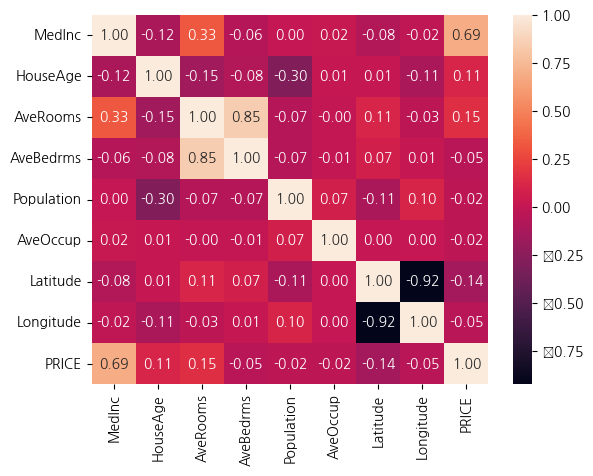

In [82]:
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.show()

In [83]:
# 후진소거 1 (MedInc+AveRooms+Population)
model = ols('PRICE~MedInc+AveRooms+Population',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     6364.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:38:46   Log-Likelihood:                -25482.
No. Observations:               20640   AIC:                         5.097e+04
Df Residuals:                   20636   BIC:                         5.100e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6493      0.018     36.066      0.0

In [84]:
# 후진소거 2 (MedInc+AveRooms)
model = ols('PRICE~MedInc+AveRooms',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9502.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:54   Log-Likelihood:                -25505.
No. Observations:               20640   AIC:                         5.102e+04
Df Residuals:                   20637   BIC:                         5.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5950      0.016     36.836      0.0

In [85]:
# 후진소거 3 (MedInc)
model = ols('PRICE~MedInc',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:43:36   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4509      0.013     34.082      0.0

In [ ]:
# 후진소거

#1 (MedInc+AveRooms+Population)
# 수정된 결정계수: 0.480
# AIC : 5.097

#2 (MedInc+AveRooms)
# 수정된 결정계수: 0.479
# AIC :5.102

#3 (MedInc)
# 수정된 결정계수: 0.473
# AIC : 5.125

### 변수소거(전진소거)를 이용한 캘리포니아 집값 다중회귀 분석

In [86]:
# 전진소거 1 (MedInc)
model = ols('PRICE~MedInc',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:48:48   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4509      0.013     34.082      0.0

In [87]:
# 전진소거 2 (AveRooms)
model = ols('PRICE~AveRooms',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     487.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          7.57e-107
Time:                        17:49:41   Log-Likelihood:                -32001.
No. Observations:               20640   AIC:                         6.401e+04
Df Residuals:                   20638   BIC:                         6.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6838      0.019     87.952      0.0

In [88]:
# 전진소거 3 (Population)
model = ols('PRICE~Population',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.55
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           0.000398
Time:                        17:50:27   Log-Likelihood:                -32236.
No. Observations:               20640   AIC:                         6.448e+04
Df Residuals:                   20638   BIC:                         6.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1044      0.013    163.012      0.0

In [89]:
# 전진소거 4 (MedInc+AveRooms)
model = ols('PRICE~MedInc+AveRooms',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9502.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:52:29   Log-Likelihood:                -25505.
No. Observations:               20640   AIC:                         5.102e+04
Df Residuals:                   20637   BIC:                         5.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5950      0.016     36.836      0.0

In [90]:
# 전진소거 5 (MedInc+Population)
model = ols('PRICE~MedInc+Population',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     9307.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:53:17   Log-Likelihood:                -25607.
No. Observations:               20640   AIC:                         5.122e+04
Df Residuals:                   20637   BIC:                         5.124e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4912      0.015     32.553      0.0

In [ ]:
# 전진소거

#1 (MedInc)
# 수정된 결정계수: 0.473
# AIC : 5.125

#2 (AveRooms) => X
# 수정된 결정계수: 0.023
# AIC :6.401

#3 (Population) => X
# 수정된 결정계수: 0.001
# AIC : 6.448

#4 (MedInc + AveRooms)
# 수정된 결정계수: 0.479
# AIC : 5.102

#5 (MedInc + Population)
# 수정된 결정계수: 0.474
# AIC : 5.122